In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [13]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from timeit import timeit
pd.options.plotting.backend = "plotly"
plt.style.use("ggplot")
%matplotlib inline

In [14]:
pd.set_option('display.precision',2)

In [15]:
#Lendo a terceira planilha com os dados
QueixasCocozap = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cocozap/Queixas_Cocozap_Geral_1.csv',sep = '\t', on_bad_lines= 'skip',dtype = 'string')

In [16]:
QueixasCocozap

,Unnamed: 0,codificacao_foto,ano,mes,dia,data,Conta para gente o que está acontecendo,Em que categoria se encaixaria o problema,Categoria 2,Com que frequência isso ocorre,Consegue nos informar o endereço de onde a foto/vídeo foi tirada,Em que localidade fica,Insira a latitude do seu endereço (opcional),Insira a longitude do seu endereço (opcional),Você já tentou solucionar o problema de alguma forma,A quem recorreu
0,0,20181019_0033,2018,10,19,20181019.0,Oi olha só aqui no esgoto da casa 206! Tá um f...,esgoto a céu aberto,Esgoto,Frequentemente,"Rua Massaranduba, 206",Parque Rubens Vaz,-22852344,-432429,sim,Sem informacao
1,1,20181019_1115,2018,10,19,20181019.0,Problemas de alagamentos sempre que chove,alagamento,Esgoto,Ocasionalmente,"Rua Santa Rita,",Nova Holanda,-22853554,-43244659,nao menciona,nao se aplica
2,2,20181105_1650,2018,11,5,20181105.0,Sem informacao,esgoto a céu aberto,Esgoto,Não informado,Beco das Américas (Rua Tatajuba),Parque Maré,-22854895,-43243645,nao menciona,nao se aplica
3,3,20181105_1651,2018,11,5,20181105.0,Sempre passo por lá e vejo esgoto caindo,esgoto a céu aberto,Esgoto,Frequentemente,Beco São Jorge (perto da praça),Nova Holanda,-22854706,-43242941,nao menciona,nao se aplica
4,4,20181105_2312,2018,11,5,20181105.0,Sem informacao,acúmulo de lixo,Lixo,Não informado,Rua Tancredo Neves (em frente à igreja Sagrada...,Nova Holanda,-22854318,-43240687,nao menciona,nao se aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,325,20230508_0837,2023,5,8,20230508.0,"Acúmulo de lixo na rua nova Jerusalém 429, timbau",Acúmulo de lixo,Lixo,Não informado,"rua nova Jerusalém 429, timbau",Morro do Timbau,-22861106,-43244611,Não,Não menciona
329,322,20220203_0757,2023,2,8,20220203.0,nessa esquina Igreja Universal&Museu da Maré s...,Boeiro entupido e transbordamento de esgoto,Esgoto,Recorrente,"R. Praia de Inhaúma, 243 - Maré",<NA>,-22865125,-43241386,Não,Não menciona
330,323,20220203_0758,2023,2,8,20220203.1,nessa esquina Igreja Universal&Museu da Maré s...,Boeiro entupido e transbordamento de esgoto,Esgoto,Recorrente,"Próximo a R. Praia de Inhaúma, 243",<NA>,-22865378,-43241547,Não,Não menciona
331,324,20230420_2009,2023,4,20,20230420.0,Vazamento de água limpa. Próximo a Rua nova Je...,Alagamento,Drenagem,Não informado,"Próximo a Rua nova Jerusalém 483, timbau",Morro do Timbau,-22861419,-43243649,Não,Não menciona


In [17]:
QueixasCocozap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Unnamed: 0                                                        333 non-null    string
 1   codificacao_foto                                                  331 non-null    string
 2   ano                                                               331 non-null    string
 3   mes                                                               331 non-null    string
 4   dia                                                               331 non-null    string
 5   data                                                              331 non-null    string
 6   Conta para gente o que está acontecendo                           331 non-null    string
 7   Em que categoria se encaixaria o problema   

In [18]:
QueixasCocozap['Em que categoria se encaixaria o problema'].value_counts()

Esgoto a céu aberto                            62
Acúmulo de lixo e entulho                      47
Acúmulo de lixo                                42
Transbordamento de esgoto                      40
Alagamento                                     32
Bueiro entupido                                32
acúmulo de lixo                                16
Transbordamento de água                        14
bueiro entupido                                 8
Problemas com bueiro                            8
acúmulo de lixo e entulho                       7
esgoto a céu aberto                             5
Boeiro entupido e transbordamento de esgoto     4
transbordamento de esgoto                       3
Qualidade da água                               2
alagamento                                      1
Acumulo de lixo                                 1
transbordamento de agua                         1
acumulo                                         1
Sem informacao                                  1


In [19]:
#Renomeando os dados da variável "Em que categoria se encaixaria o problema"
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('bueiro entupido','Bueiro entupido')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('acúmulo de lixo','Acúmulo de lixo ')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('alagamento','Alagamento')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('transbordamento de agua','Transbordamento de agua')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('acúmulo de lixo e entulho','Acúmulo de lixo e entulho')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('Acumulo de lixo ','Acúmulo de lixo')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('esgoto a céu aberto','Esgoto a céu aberto')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('transbordamento de esgoto','Transbordamento de esgoto')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('acumulo','Acúmulo de lixo')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('Acúmulo de lixo ','Acúmulo de lixo')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('Transbordamento de agua','Transbordamento de água')
QueixasCocozap['Em que categoria se encaixaria o problema'] = QueixasCocozap['Em que categoria se encaixaria o problema'].replace('Acumulo de lixo','Acúmulo de lixo')

In [20]:
QueixasCocozap['Em que localidade fica'] = QueixasCocozap['Em que localidade fica'].replace('Conjunto Bento Ribeiro Dantas','Bento Ribeiro Dantas')
QueixasCocozap['Em que localidade fica'] = QueixasCocozap['Em que localidade fica'].replace('Vila do Pinheiro','Vila dos Pinheiros')

In [21]:
QueixasCocozap['Subcategoria'] = QueixasCocozap['Em que categoria se encaixaria o problema'].astype('category')

In [22]:
QueixasCocozap['Subcategoria'].cat.set_categories(['Acúmulo de lixo','Alagamento','Acúmulo de lixo e entulho ', 'Bueiro entupido ','Esgoto a céu aberto',"Falta d'água",'Problemas com bueiro','Qualidade da água','Transbordamento de água','Transbordamento de esgoto'],inplace=True)

<ipython-input-22-49d90d16ebbc>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  QueixasCocozap['Subcategoria'].cat.set_categories(['Acúmulo de lixo','Alagamento','Acúmulo de lixo e entulho ', 'Bueiro entupido ','Esgoto a céu aberto',"Falta d'água",'Problemas com bueiro','Qualidade da água','Transbordamento de água','Transbordamento de esgoto'],inplace=True)


In [23]:
QueixasCocozap['Subcategoria'].cat.set_categories(['Acúmulo de lixo','Alagamento','Acúmulo de lixo e entulho ', 'Bueiro entupido ','Esgoto a céu aberto',"Falta d'água",'Problemas com bueiro','Qualidade da água','Transbordamento de água','Transbordamento de esgoto'],inplace=True)


<ipython-input-23-49d90d16ebbc>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  QueixasCocozap['Subcategoria'].cat.set_categories(['Acúmulo de lixo','Alagamento','Acúmulo de lixo e entulho ', 'Bueiro entupido ','Esgoto a céu aberto',"Falta d'água",'Problemas com bueiro','Qualidade da água','Transbordamento de água','Transbordamento de esgoto'],inplace=True)


In [24]:
QueixasCocozap = QueixasCocozap.loc[QueixasCocozap['Em que categoria se encaixaria o problema'] != '-4324111459596010']

In [25]:
QueixasLocalidade = pd.DataFrame(pd.pivot_table(QueixasCocozap,index = ['Em que localidade fica'] , columns = ['Subcategoria'],values = 'dia'  , aggfunc = 'count', fill_value = '0'))
QueixasLocalidade

Subcategoria,Acúmulo de lixo,Alagamento,Acúmulo de lixo e entulho,Bueiro entupido,Esgoto a céu aberto,Falta d'água,Problemas com bueiro,Qualidade da água,Transbordamento de água,Transbordamento de esgoto
Em que localidade fica,,,,,,,,,,
Baixa do Sapateiro,11,2,0,0,10,0,4,0,4,11
Bento Ribeiro Dantas,1,0,0,0,1,0,0,0,0,0
Conjunto Esperança,0,1,0,0,1,0,0,0,0,1
Conjunto Pinheiros,0,0,0,0,1,0,0,0,0,1
Marcílio Dias,2,3,0,0,0,0,0,0,1,0
Morro do Timbau,8,2,0,0,4,0,0,0,2,0
Nova Holanda,10,7,0,0,8,0,0,0,1,10
Nova Maré,3,0,0,0,4,0,2,0,0,2
Parque Maré,2,1,0,0,5,0,0,2,0,2


In [26]:
#plt.figure(figsize = (15,12))
QueixasLocalidade.plot(kind = 'barh')
#plt.legend(bbox_to_anchor = (1.05, 0.6))
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Cocozap/Queixas_Localidade.png')

In [27]:
Sub_categorias = pd.DataFrame(QueixasCocozap['Subcategoria'].value_counts())
Sub_categorias['%Subcategoria'] = (Sub_categorias['Subcategoria']/ Sub_categorias['Subcategoria'].sum()) * 100
Sub_categorias

,Subcategoria,%Subcategoria
Esgoto a céu aberto,67,29.39
Acúmulo de lixo,60,26.32
Transbordamento de esgoto,43,18.86
Alagamento,33,14.47
Transbordamento de água,15,6.58
Problemas com bueiro,8,3.51
Qualidade da água,2,0.88
Acúmulo de lixo e entulho,0,0.00
Bueiro entupido,0,0.00
Falta d'água,0,0.00


In [29]:
#Gerando o gráfico
Sub_categorias['%Subcategoria'].plot(kind = 'barh')

In [30]:
QueixasLocalidade.to_csv('/content/drive/MyDrive/Colab Notebooks/Cocozap/Queixas_Localidade.csv')

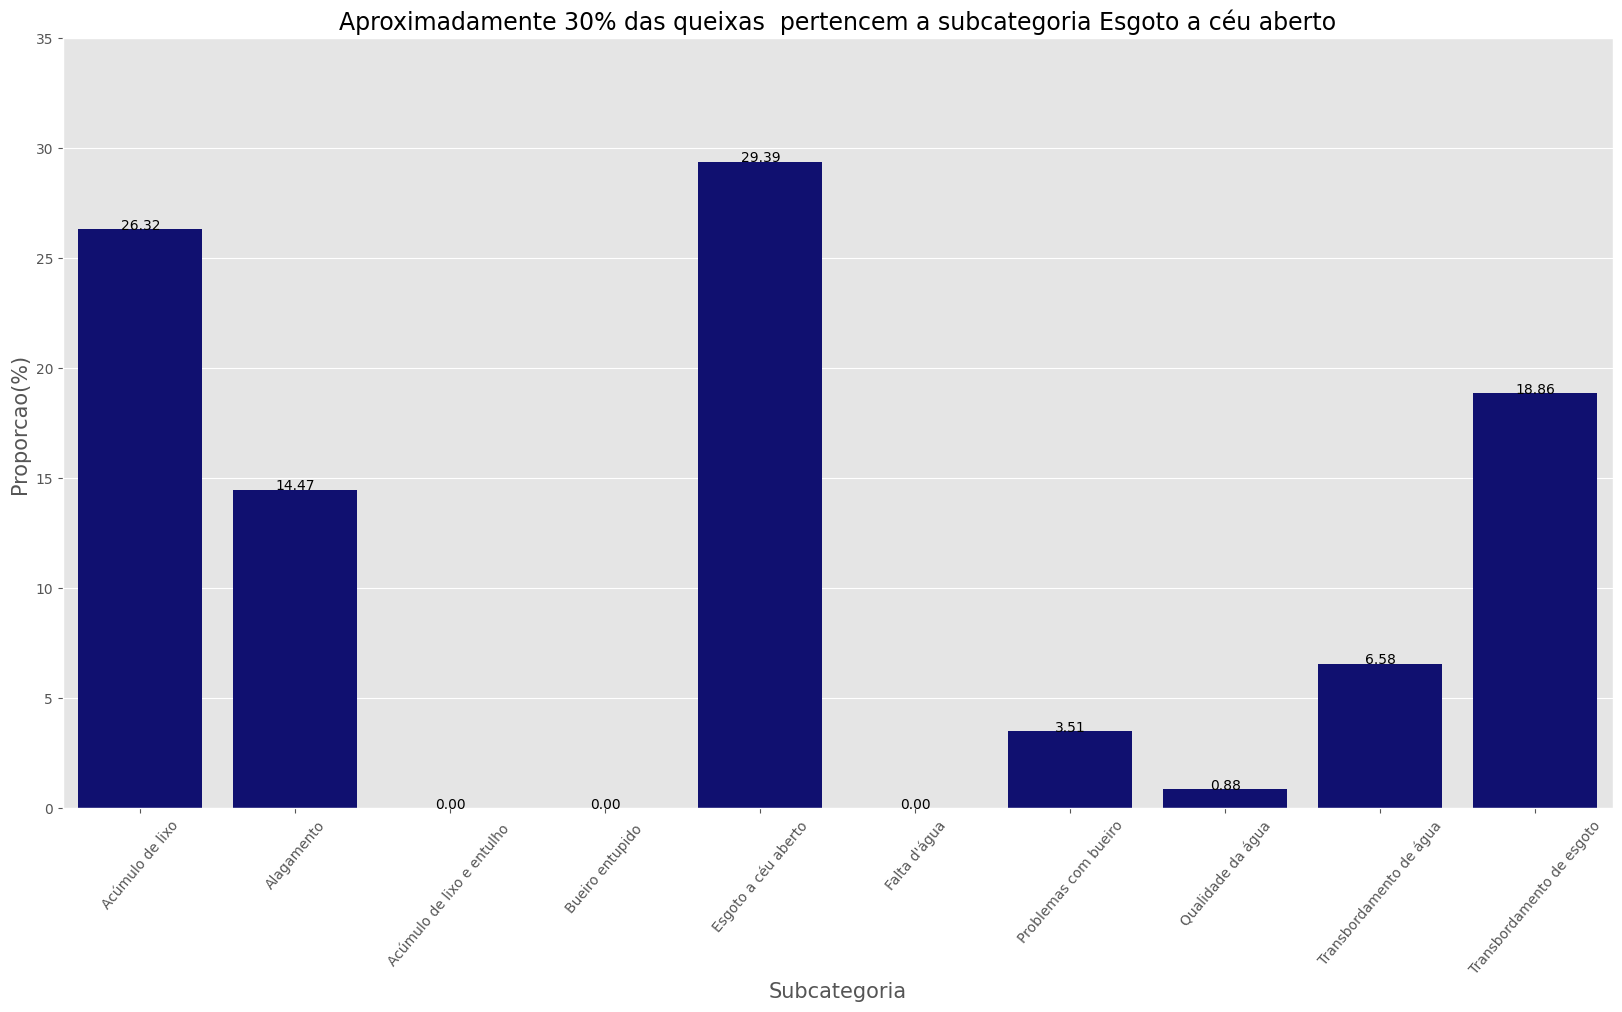

In [31]:
#Gerando o gráfico
plt.figure(figsize=(20,10))
ax = sns.barplot(x =Sub_categorias.index ,y= Sub_categorias['%Subcategoria'] ,data = Sub_categorias, color = 'Navy')
plt.xticks(rotation=50)
ax.set(ylim=(0,35))
ax.set_title('Aproximadamente 30% das queixas  pertencem a subcategoria Esgoto a céu aberto', fontsize = 17)
ax.set_xlabel('Subcategoria',fontsize = 15)
ax.set_ylabel('Proporcao(%)',fontsize=15)
#Incluindo os rótulos nas barras:
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height,
  '{:1.2f}'.format((height)),
  ha='center')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Cocozap/Graf_Subcategorias.png')

In [32]:
QueixasCocozap['Subcategoria'].plot(kind = 'barh')


In [34]:
QueixasLocalidade1.plot(kind = 'barh')